In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt
import scipy as sci
import stan_helpers as sh

In [36]:
serall=pd.read_csv("serotonin_longform.csv")
serall

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias
0,0,1,1,10/31,1,aMW,903.0,0.548780
1,1,1,2,10/31,1,aMW,12.0,0.413669
2,2,1,3,10/31,1,aMW,553.0,0.458333
3,3,1,4,10/31,1,aMW,250.0,0.447405
4,4,1,5,10/31,1,aMW,506.0,0.348515
...,...,...,...,...,...,...,...,...
5179,5179,3,92,2/22,17,aMW,-1.0,NaN
5180,5180,3,93,2/22,17,aMW,-1.0,NaN
5181,5181,3,94,2/22,17,aMW,222.0,0.271493
5182,5182,3,95,2/22,17,aMW,-1.0,NaN


In [37]:
serall["uID"]=pd.Categorical("F"+pd.Series(serall["Fly ID"], dtype=str)+"B"+pd.Series(serall["Batch #"], dtype=str) + "C" + pd.Series(serall["Drug Treatment"], dtype=str)).codes
serall["uID"].unique().shape

(576,)

In [38]:
sersome=pd.read_csv("MayLongform.csv")
sersome

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias
0,0,1,1,5/4,1,TrH,466,0.526882
1,1,1,2,5/4,1,TrH,500,0.442886
2,2,1,3,5/4,1,TrH,567,0.556537
3,3,1,4,5/4,1,TrH,526,0.565714
4,4,1,5,5/4,1,TrH,370,0.696477
...,...,...,...,...,...,...,...,...
1723,1723,1,92,5/20,17,control,-1,NaN
1724,1724,1,93,5/20,17,control,-1,NaN
1725,1725,1,94,5/20,17,control,-1,NaN
1726,1726,1,95,5/20,17,control,-1,NaN


In [34]:
sersome["uID"]=pd.Categorical("F"+pd.Series(sersome["Fly ID"], dtype=str)+"B"+pd.Series(sersome["Batch #"], dtype=str) + "C" + pd.Series(sersome["Drug Treatment"], dtype=str)).codes
sersome["uID"].unique().shape

(192,)

In [18]:
serall=pd.concat([serall, sersome])
serall.reset_index(inplace=True)

In [19]:
serall.drop(columns=["index"], inplace=True)


In [20]:
# serall.loc[serall["Drug Treatment"]=="control","Drug Treatment"]="Control"
# serall


In [21]:

serall["Drug Treatment"].unique()

array(['aMW', 'Control', '5-HTP', 'TrH', 'control'], dtype=object)

In [22]:
serall["Fly ID"]+serall["Batch #"]

0        2
1        3
2        4
3        5
4        6
        ..
6907    93
6908    94
6909    95
6910    96
6911    97
Length: 6912, dtype: int64

In [24]:
serall

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias
0,0,1,1,10/31,1,aMW,903.0,0.548780
1,1,1,2,10/31,1,aMW,12.0,0.413669
2,2,1,3,10/31,1,aMW,553.0,0.458333
3,3,1,4,10/31,1,aMW,250.0,0.447405
4,4,1,5,10/31,1,aMW,506.0,0.348515
...,...,...,...,...,...,...,...,...
6907,1723,1,92,5/20,17,control,-1.0,NaN
6908,1724,1,93,5/20,17,control,-1.0,NaN
6909,1725,1,94,5/20,17,control,-1.0,NaN
6910,1726,1,95,5/20,17,control,-1.0,NaN


In [27]:
serall["uID"]=pd.Categorical("F"+pd.Series(serall["Fly ID"], dtype=str)+"B"+pd.Series(serall["Batch #"], dtype=str) + "C" + pd.Series(serall["Drug Treatment"], dtype=str)).codes

In [30]:
len(serall["uID"].unique())

768

In [548]:
serall["x"]=np.array(((serall["nTurns"]+1)*serall["rBias"]), dtype=int)
serall.dropna()

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
0,0,1,1,5/4,1,TrH,466,0.526882,21,246
1,1,1,2,5/4,1,TrH,500,0.442886,43,221
2,2,1,3,5/4,1,TrH,567,0.556537,65,316
3,3,1,4,5/4,1,TrH,526,0.565714,87,298
4,4,1,5,5/4,1,TrH,370,0.696477,109,258
...,...,...,...,...,...,...,...,...,...,...
1714,1714,1,83,5/20,17,Control,27,0.576923,160,16
1716,1716,1,85,5/20,17,Control,29,0.392857,164,11
1718,1718,1,87,5/20,17,Control,24,0.434783,168,10
1719,1719,1,88,5/20,17,Control,29,0.535714,170,16


In [549]:
5/12

0.4166666666666667

In [550]:
1/serall["rBias"]

0       1.897959
1       2.257919
2       1.796825
3       1.767677
4       1.435798
          ...   
1723         NaN
1724         NaN
1725         NaN
1726         NaN
1727         NaN
Name: rBias, Length: 1728, dtype: float64

(array([ 38.,   8.,  55., 169., 292., 400., 226.,  83.,  15.,   7.]),
 array([0.        , 0.09274336, 0.18548672, 0.27823009, 0.37097345,
        0.46371681, 0.55646017, 0.64920353, 0.74194689, 0.83469026,
        0.92743362]),
 <BarContainer object of 10 artists>)

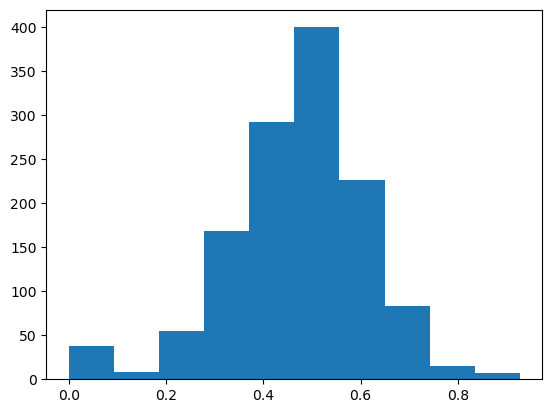

In [551]:
plt.hist(((serall["nTurns"])*serall["rBias"])%1)

In [552]:
serall_obs=serall.dropna()
serall_obs=serall_obs[serall_obs["nTurns"]>0]
serall_obs

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
0,0,1,1,5/4,1,TrH,466,0.526882,21,246
1,1,1,2,5/4,1,TrH,500,0.442886,43,221
2,2,1,3,5/4,1,TrH,567,0.556537,65,316
3,3,1,4,5/4,1,TrH,526,0.565714,87,298
4,4,1,5,5/4,1,TrH,370,0.696477,109,258
...,...,...,...,...,...,...,...,...,...,...
1714,1714,1,83,5/20,17,Control,27,0.576923,160,16
1716,1716,1,85,5/20,17,Control,29,0.392857,164,11
1718,1718,1,87,5/20,17,Control,24,0.434783,168,10
1719,1719,1,88,5/20,17,Control,29,0.535714,170,16


In [553]:
serall_mis=serall.drop(serall_obs.index)
serall_mis

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
24,24,1,25,5/4,1,TrH,-1,NaN,33,0
77,77,1,78,5/4,1,TrH,1,NaN,149,0
91,91,1,92,5/4,1,TrH,-1,NaN,181,0
106,106,1,11,5/5,2,TrH,-1,NaN,3,0
107,107,1,12,5/5,2,TrH,-1,NaN,5,0
...,...,...,...,...,...,...,...,...,...,...
1723,1723,1,92,5/20,17,Control,-1,NaN,180,0
1724,1724,1,93,5/20,17,Control,-1,NaN,182,0
1725,1725,1,94,5/20,17,Control,-1,NaN,184,0
1726,1726,1,95,5/20,17,Control,-1,NaN,186,0


In [554]:
posnturns=serall[serall["nTurns"]>0]
posnturns[posnturns.isna().any(axis=1)]

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
77,77,1,78,5/4,1,TrH,1,NaN,149,0
286,286,1,95,5/6,3,TrH,1,NaN,187,0
390,390,1,7,5/12,9,TrH,1,NaN,153,0
538,538,1,59,5/13,10,TrH,1,NaN,107,0
561,561,1,82,5/13,10,TrH,1,NaN,159,0
570,570,1,91,5/13,10,TrH,1,NaN,179,0
596,596,1,21,5/18,15,TrH,1,NaN,25,0
643,643,1,68,5/18,15,TrH,1,NaN,127,0
740,740,1,69,5/19,16,TrH,1,NaN,129,0
763,763,1,92,5/19,16,TrH,1,NaN,181,0


In [555]:
serna=serall[serall.isna().any(axis=1)]
serna[serna["nTurns"]>0]

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
77,77,1,78,5/4,1,TrH,1,NaN,149,0
286,286,1,95,5/6,3,TrH,1,NaN,187,0
390,390,1,7,5/12,9,TrH,1,NaN,153,0
538,538,1,59,5/13,10,TrH,1,NaN,107,0
561,561,1,82,5/13,10,TrH,1,NaN,159,0
570,570,1,91,5/13,10,TrH,1,NaN,179,0
596,596,1,21,5/18,15,TrH,1,NaN,25,0
643,643,1,68,5/18,15,TrH,1,NaN,127,0
740,740,1,69,5/19,16,TrH,1,NaN,129,0
763,763,1,92,5/19,16,TrH,1,NaN,181,0


In [556]:
serall[serall["nTurns"]>0].isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1714    False
1716    False
1718    False
1719    False
1721    False
Length: 1310, dtype: bool

In [557]:
#select from serall all rows where rBias is Nan or nTurns is less than 1
serna=serall[serall.isna().any(axis=1)]
serna=serna[serna["nTurns"]<0]
serna


,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
24,24,1,25,5/4,1,TrH,-1,NaN,33,0
91,91,1,92,5/4,1,TrH,-1,NaN,181,0
106,106,1,11,5/5,2,TrH,-1,NaN,3,0
107,107,1,12,5/5,2,TrH,-1,NaN,5,0
108,108,1,13,5/5,2,TrH,-1,NaN,7,0
...,...,...,...,...,...,...,...,...,...,...
1723,1723,1,92,5/20,17,Control,-1,NaN,180,0
1724,1724,1,93,5/20,17,Control,-1,NaN,182,0
1725,1725,1,94,5/20,17,Control,-1,NaN,184,0
1726,1726,1,95,5/20,17,Control,-1,NaN,186,0


In [558]:
serall[serall["nTurns"]>0]

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
0,0,1,1,5/4,1,TrH,466,0.526882,21,246
1,1,1,2,5/4,1,TrH,500,0.442886,43,221
2,2,1,3,5/4,1,TrH,567,0.556537,65,316
3,3,1,4,5/4,1,TrH,526,0.565714,87,298
4,4,1,5,5/4,1,TrH,370,0.696477,109,258
...,...,...,...,...,...,...,...,...,...,...
1714,1714,1,83,5/20,17,Control,27,0.576923,160,16
1716,1716,1,85,5/20,17,Control,29,0.392857,164,11
1718,1718,1,87,5/20,17,Control,24,0.434783,168,10
1719,1719,1,88,5/20,17,Control,29,0.535714,170,16


In [559]:
serall[serall["nTurns"]<1].dropna()

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x


In [560]:
# serall_mis=serall[serall.isna().any(axis=1)]
# # serall_mis=serall[serall[serall["nTurns"]>0].isna().any(axis=1)]
# serall_mis=pd.concat(serall_mis, serall[serall["nTurns"]<1])

In [561]:
# np.array(np.nan, dtype=int)

In [562]:
# skt_unmelted_mis_b=skt_unmelted_mis
dummyrow=serall_mis.iloc[0,:]
dummyrow
actualdays=np.unique(serall_mis["Day"])
fullrange=np.arange(0,np.max(actualdays), dtype=float)
for ii, i in enumerate(actualdays):
  for jj, j in enumerate(fullrange):
    if j==i:
      # print(j)
      # print(i)
      fullrange[jj]=np.nan


missingdays=np.array(pd.Series(fullrange).dropna(), dtype=int)


In [563]:

np.unique(serall_obs["Day"])
for i in range(serall["uID"].unique().shape[0]):
  dummyrownew=dummyrow.copy()
  dummyrownew.loc['uID']=int(i)
  for j in missingdays:
    dummyrownew.loc['Day']=int(j)
    serall_mis=pd.concat([serall_mis, pd.DataFrame(dummyrownew).T])
    # skt_unmelted_mis_b.append(dummyrow)

In [564]:
serall["uID"].unique().shape[0]

192

In [565]:
pd.Categorical(serall["uID"]).codes.max()

191

In [566]:
np.array(serall["Day"], dtype=int)+1

array([ 2,  2,  2, ..., 18, 18, 18])

In [567]:
serall_mis["uID"]

24      33
77     149
91     181
106      3
107      5
      ... 
24     191
24     191
24     191
24     191
24     191
Name: uID, Length: 2163, dtype: object

In [568]:
serall

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
0,0,1,1,5/4,1,TrH,466,0.526882,21,246
1,1,1,2,5/4,1,TrH,500,0.442886,43,221
2,2,1,3,5/4,1,TrH,567,0.556537,65,316
3,3,1,4,5/4,1,TrH,526,0.565714,87,298
4,4,1,5,5/4,1,TrH,370,0.696477,109,258
...,...,...,...,...,...,...,...,...,...,...
1723,1723,1,92,5/20,17,Control,-1,NaN,180,0
1724,1724,1,93,5/20,17,Control,-1,NaN,182,0
1725,1725,1,94,5/20,17,Control,-1,NaN,184,0
1726,1726,1,95,5/20,17,Control,-1,NaN,186,0


In [569]:
(pd.Categorical(serall["Drug Treatment"]).codes+1).shape

(1728,)

In [570]:
serall_u=serall.drop_duplicates(subset="uID").sort_values("uID")
serall_u

,Unnamed: 0,Batch #,Fly ID,Date,Day,Drug Treatment,nTurns,rBias,uID,x
873,873,1,10,5/4,1,Control,439,0.296804,0,130
9,9,1,10,5/4,1,TrH,26,0.480000,1,12
874,874,1,11,5/4,1,Control,497,0.447581,2,222
10,10,1,11,5/4,1,TrH,653,0.447853,3,292
875,875,1,12,5/4,1,Control,0,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...
94,94,1,95,5/4,1,TrH,243,0.512397,187,125
959,959,1,96,5/4,1,Control,34,0.515152,188,18
95,95,1,96,5/4,1,TrH,490,0.480573,189,235
872,872,1,9,5/4,1,Control,362,0.426593,190,154


In [571]:
# serall0=serall[serall["uID"]==0]
# seralld1=serall[serall0["Day"]==1]
# seralld1

In [572]:
# serall[serall[serall["Day"]==1]["uID"==0]]

In [573]:
serall[serall["Day"]==1].value_counts(subset="uID")

uID
0      1
1      1
122    1
123    1
124    1
      ..
66     1
67     1
68     1
69     1
191    1
Length: 192, dtype: int64

In [574]:
serall["uID"].unique().shape[0]

192

In [575]:
# del dgrp_data_ser_m6
dgrp_data_ser_m6={
  "N": serall["uID"].unique().shape[0], # skt.shape[0], #Total number of flies
  "S": serall["Drug Treatment"].unique().shape[0], #Total number of Lines
  
  "T": int(serall["Day"].max()+1), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(serall_u["Drug Treatment"]).codes+1, # list of line number per fly
  "fly_i_obs": serall_obs["uID"]+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(serall_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": serall_obs['nTurns'].shape[0], # total number of observed trials
  "x_obs": np.array(serall_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(serall_obs['nTurns']+1, dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(serall_mis["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(serall_mis["Day"], dtype=int)+1, # indexes of day number for flattened observations
  "t_mis": serall_mis['nTurns'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}


In [576]:
dgrp_data_ser_m6

{'N': 192,
 'S': 2,
 'T': 18,
 's': array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int8),
 'fly_i_obs': 0        22
 1        44
 2        66
 3        88
 4       110
        ... 
 1714    161
 1716    165
 1718    169
 1719    171
 1721    177
 Name: uID, Length: 1293, dtype: int16,
 'time_i_obs': array([ 2,  2,  2, ..., 18, 18, 18]),
 't_obs': 1293,
 'x_obs': array([246, 221, 316, ...,  

In [426]:
modelname="dgrp_model6_bounding_scaled"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
model_bound = CmdStanModel(stan_file=stan_file)


15:58:10 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6_bounding_scaled.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6_bounding_scaled
15:58:19 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6_bounding_scaled


In [427]:
(dgrp_data_ser_m6["n_obs"]<1).sum()

0

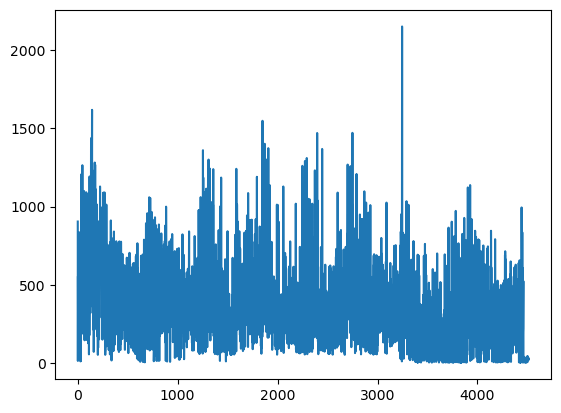

In [428]:
plt.plot(dgrp_data_ser_m6["n_obs"])

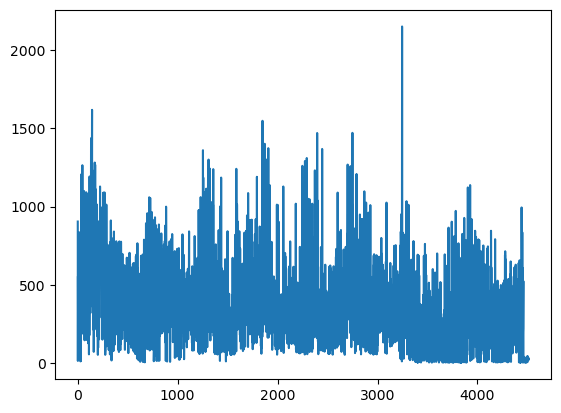

In [429]:
plt.plot(dgrp_data_ser_m6["n_obs"])

In [430]:
fit_bound = model_bound.sample(data=dgrp_data_ser_m6,
#  show_console=True,
  iter_sampling=1000)

15:58:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:36:07 - cmdstanpy - INFO - CmdStan done processing.
19:36:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -10.9197, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmprpn2duwx/tmp7fl5746x.stan', line 71, column 10 to column 79)
	Exception: normal_lpdf: Scale parameter is -0.181511, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmprpn2duwx/tmp7fl5746x.stan', line 71, column 10 to column 79)
	Exception: normal_lpdf: Scale parameter is -0.0814149, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmprpn2duwx/tmp7fl5746x.stan', line 71, column 10 to column 79)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmprpn2duwx/tmp7fl5746x.stan', line 65, column 8 to column 39)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q3

19:36:09 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 2 had 999 iterations at max treedepth (99.9%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 3 had 998 iterations at max treedepth (99.8%)
	Chain 4 had 1 divergent transitions (0.1%)
	Chain 4 had 999 iterations at max treedepth (99.9%)
	Use function "diagnose()" to see further information.


In [446]:
pd.Categorical(serall["Drug Treatment"]).categories

Index(['5-HTP', 'Control', 'TrH', 'aMW', 'control'], dtype='object')

In [453]:
fit_bound.diagnose()

"Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dgrp_model6_bounding_scaledgmc7489b/dgrp_model6_bounding_scaled-20230613155820_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dgrp_model6_bounding_scaledgmc7489b/dgrp_model6_bounding_scaled-20230613155820_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dgrp_model6_bounding_scaledgmc7489b/dgrp_model6_bounding_scaled-20230613155820_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dgrp_model6_bounding_scaledgmc7489b/dgrp_model6_bounding_scaled-20230613155820_4.csv\n\nChecking sampler transitions treedepth.\n3996 of 4000 (99.90%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\n4 of 4000 (0.10%) transitions ended with a divergence.\

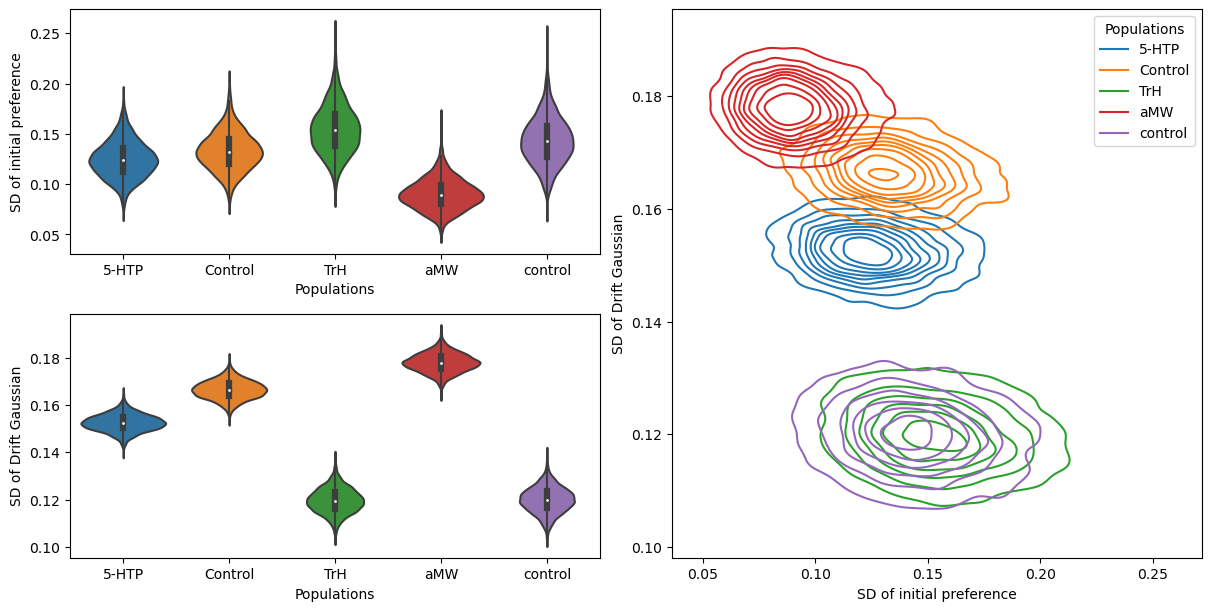

In [447]:
import importlib as imp
imp.reload(sh)
fig, fd = sh.plotResults(fit_bound, pd.Categorical(serall["Drug Treatment"]).categories, check=False)

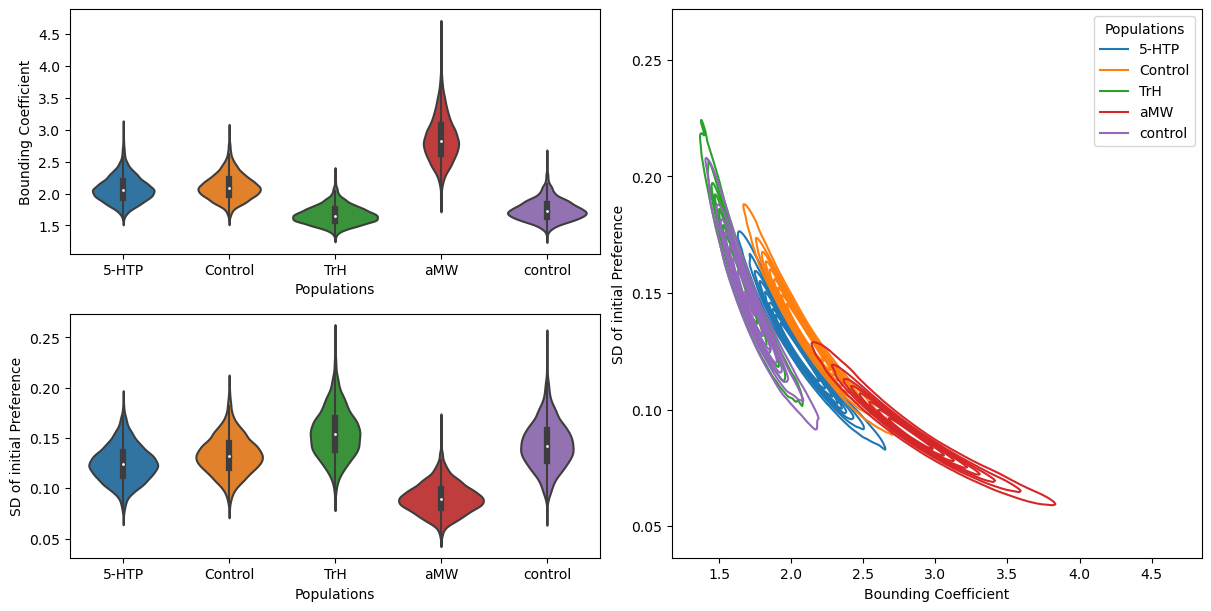

In [448]:
fig, fd = sh.plotResults(fit_bound, pd.Categorical(serall["Drug Treatment"]).categories, var1="BH", var2="B", Des1="SD of initial Preference", Des2="Bounding Coefficient", check=False)

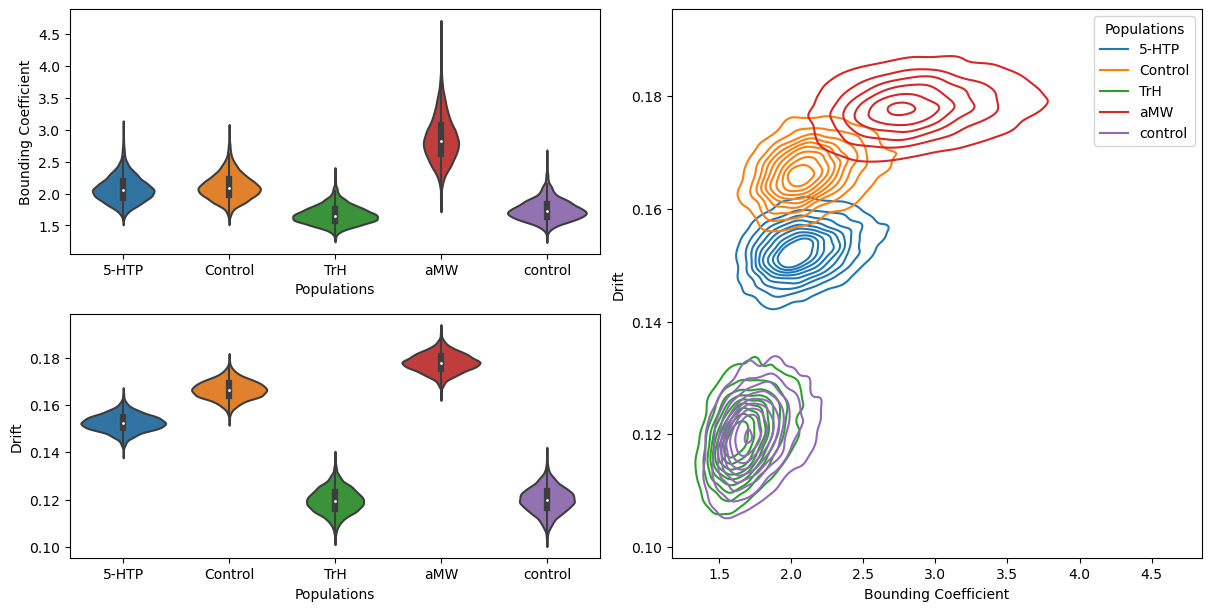

In [452]:
fig, fd = sh.plotResults(fit_bound, pd.Categorical(serall["Drug Treatment"]).categories, var1="D", var2="B", Des1="Drift", Des2="Bounding Coefficient", check=False)

# Phi Version

In [577]:
# del dgrp_data_ser_m6
dgrp_data_ser_m6={
  "N": serall["uID"].unique().shape[0], # skt.shape[0], #Total number of flies
  "S": serall["Drug Treatment"].unique().shape[0], #Total number of Lines
  
  "T": int(serall["Day"].max()+1), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(serall_u["Drug Treatment"]).codes+1, # list of line number per fly
  "fly_i_obs": serall_obs["uID"]+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(serall_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": serall_obs['nTurns'].shape[0], # total number of observed trials
  "x_obs": np.array(serall_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(serall_obs['nTurns']+1, dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(serall_mis["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(serall_mis["Day"], dtype=int)+1, # indexes of day number for flattened observations
  "t_mis": serall_mis['nTurns'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}


In [578]:
modelname="dmodel6_AR_transformed"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
model3 = CmdStanModel(stan_file=stan_file)


22:12:26 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed
22:12:35 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed


In [579]:
fit3 = model3.sample(data=dgrp_data_ser_m6,
#  show_console=True,
 adapt_delta=0.999,
 
  iter_sampling=2000)

22:12:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:14:45 - cmdstanpy - INFO - CmdStan done processing.
22:14:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptzgb5h0c/tmpmph7qvki.stan', line 78, column 10 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptzgb5h0c/tmpmph7qvki.stan', line 74, column 8 to column 34)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptzgb5h0c/tmpmph7qvki.stan', line 78, column 10 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptzgb5h0c/tmpmph7qvki.stan', line 78, column 10 to column 51)
Consider re-running with show_console=True if the above output is unclear!


In [580]:
print(fit3.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_transformedagp1h61u/dmodel6_AR_transformed-20230613221240_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_transformedagp1h61u/dmodel6_AR_transformed-20230613221240_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_transformedagp1h61u/dmodel6_AR_transformed-20230613221240_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_transformedagp1h61u/dmodel6_AR_transformed-20230613221240_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



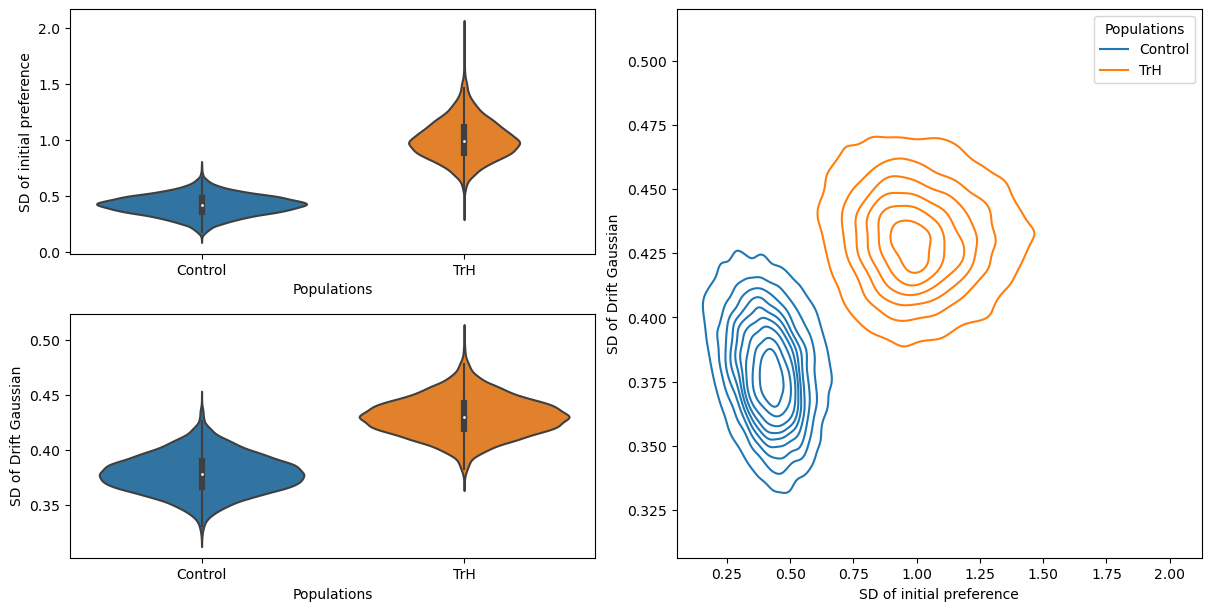

In [581]:
import importlib as imp
imp.reload(sh)
fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, check=False)
fig.savefig("5ht_Stan_justthatexperiment.pdf", dpi=300)

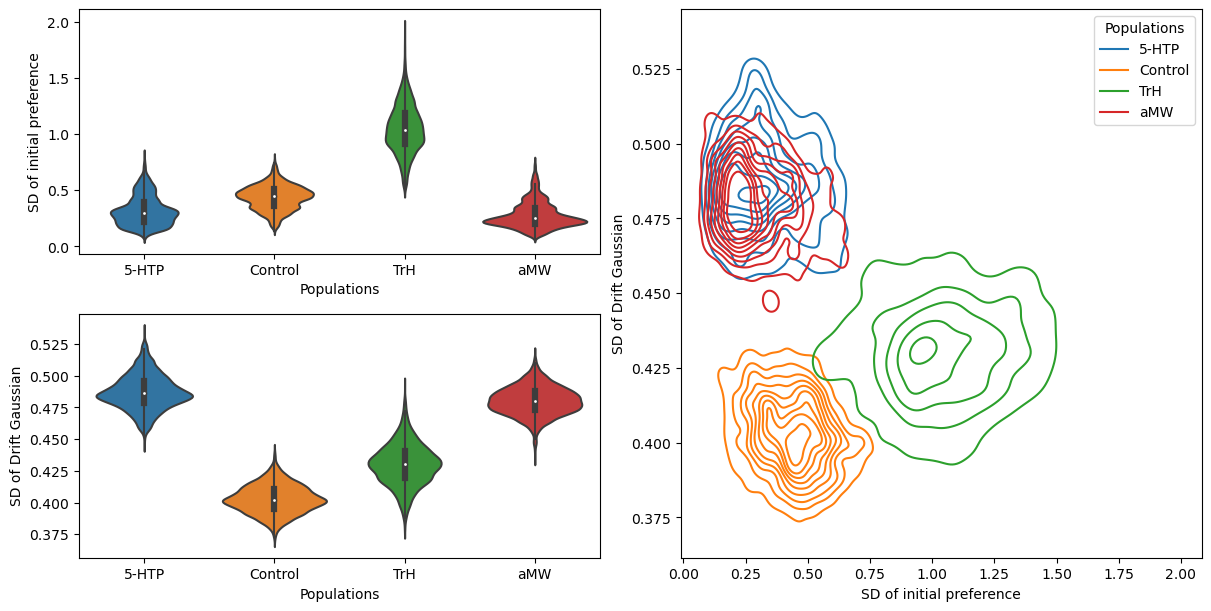

In [540]:
import importlib as imp
imp.reload(sh)
fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, check=False)
fig.savefig("5ht_Stan_newnew.pdf", dpi=300)

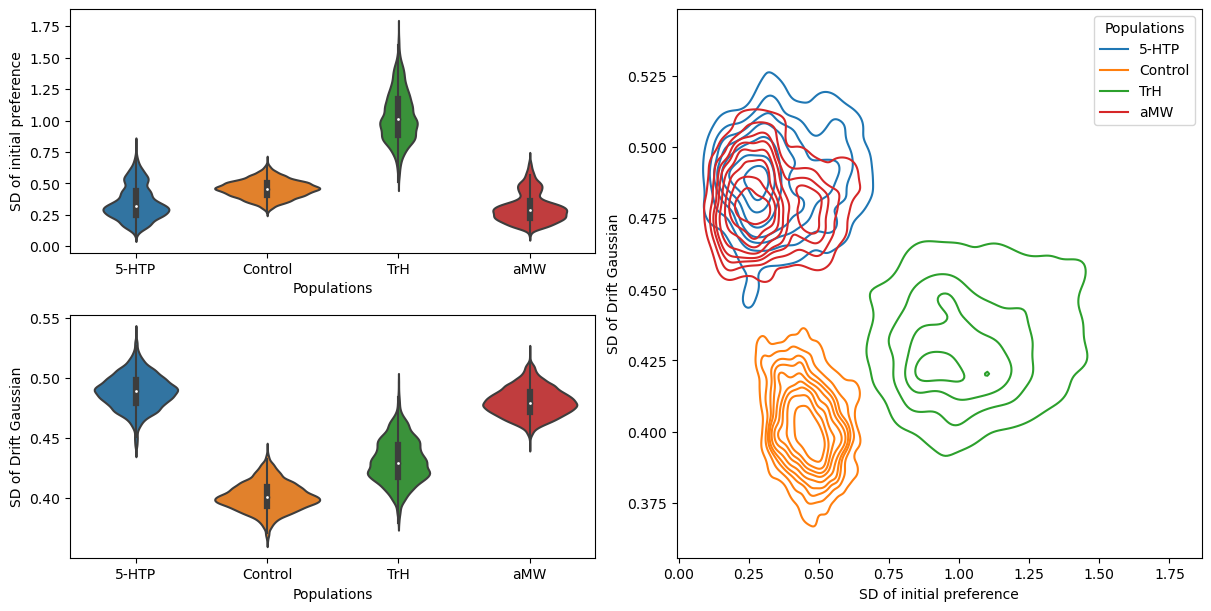

In [537]:
#This one was .99 adapt_delta, 2000 iter_sampling
import importlib as imp
imp.reload(sh)
fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, check=False)
fig.savefig("5ht_Stan_new.pdf", dpi=300)

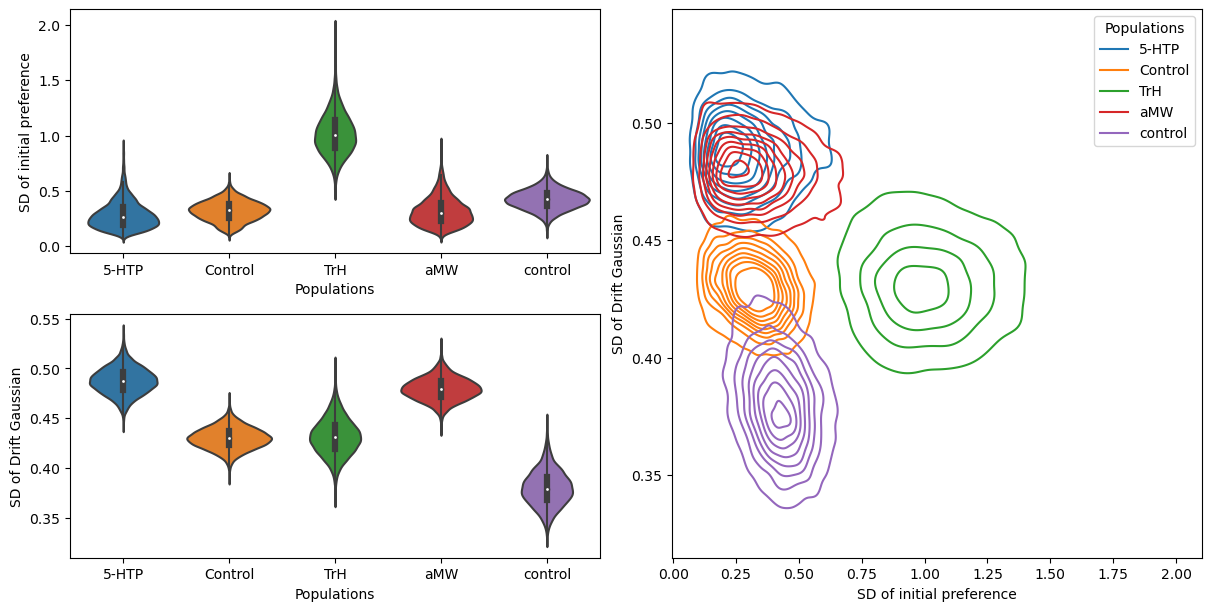

In [439]:
# import importlib as imp
# imp.reload(sh)
# fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, check=False)
# fig.savefig("5ht_Stan.pdf", dpi=300)


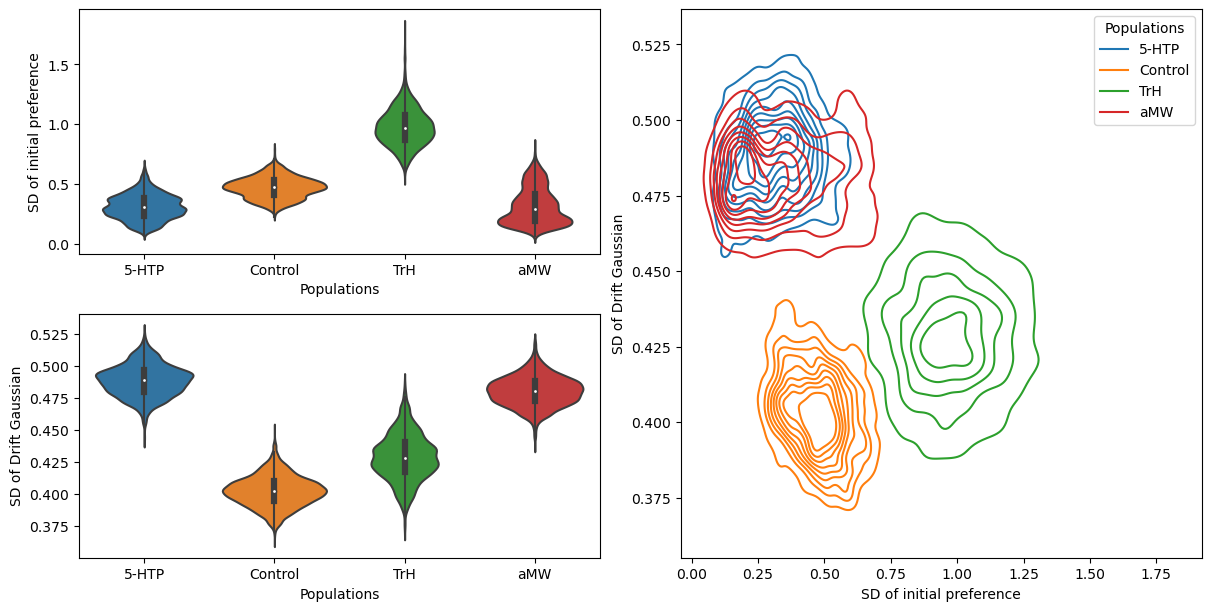

In [534]:
# import importlib as imp
# imp.reload(sh)
# fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, check=False)
# fig.savefig("5ht_Stan_new.pdf", dpi=300)
#This one was high adapt, pooling controls

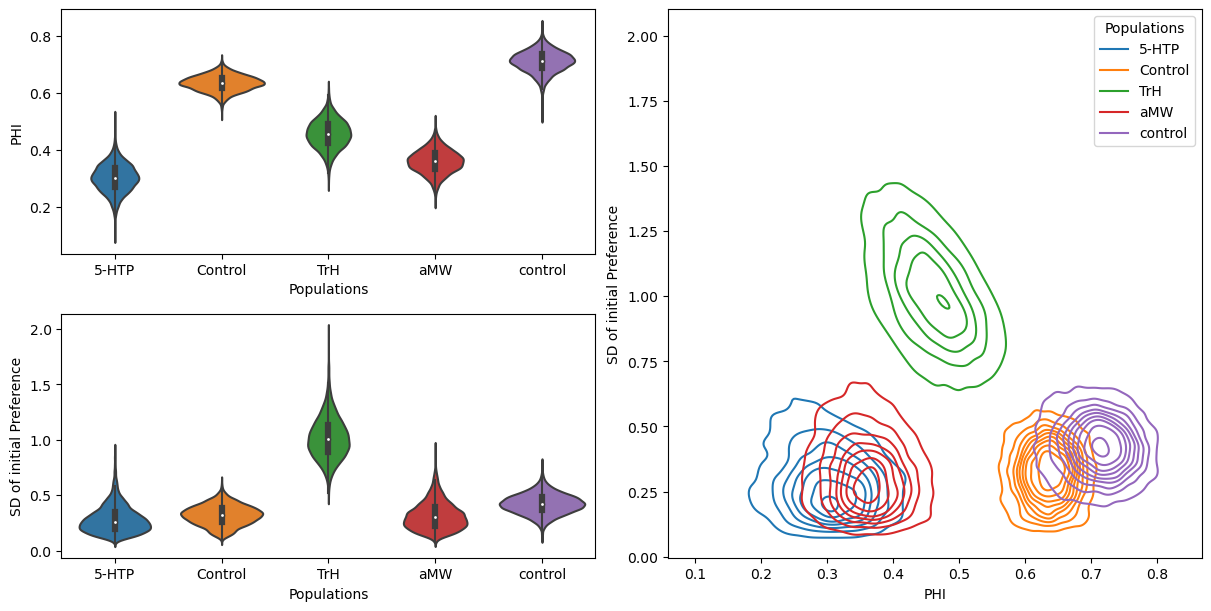

In [440]:
fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, var1="BH", var2="PHI", Des1="SD of initial Preference", Des2="PHI", check=False)

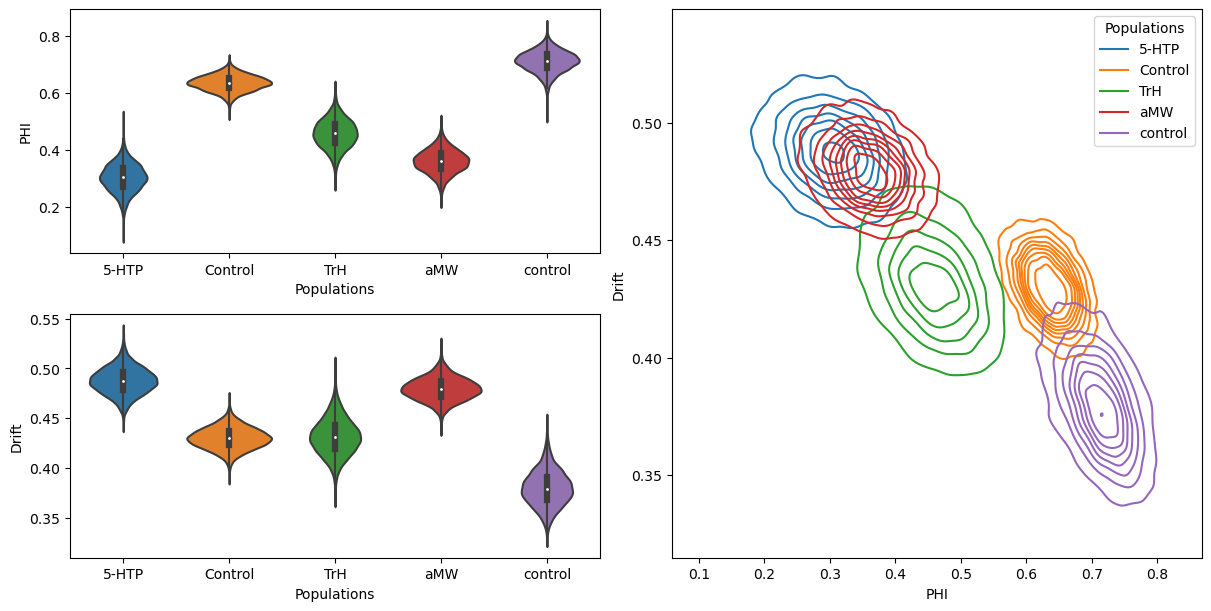

In [441]:
fig, fd = sh.plotResults(fit3, pd.Categorical(serall["Drug Treatment"]).categories, var1="D", var2="PHI", Des1="Drift", Des2="PHI", check=False)

# Single Phi

In [442]:
modelname="dmodel6_AR_singlephi"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
singlephi = CmdStanModel(stan_file=stan_file)


19:45:11 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephi.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephi
19:45:19 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_singlephi


In [443]:
fit_singlephi = singlephi.sample(data=dgrp_data_ser_m6,
#  show_console=True,
  iter_sampling=1000)

19:45:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:47:04 - cmdstanpy - INFO - CmdStan done processing.
19:47:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp6mh8gqxt/tmp0kbz9mi3.stan', line 80, column 10 to column 48)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp6mh8gqxt/tmp0kbz9mi3.stan', line 80, column 10 to column 48)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp6mh8gqxt/tmp0kbz9mi3.stan', line 80, column 10 to column 48)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp6mh8gqxt/tmp0kbz9mi3.stan', line 80, column 10 to column 48)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp6mh8gqx

In [444]:
print(fit_singlephi.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_singlephiilfc74ln/dmodel6_AR_singlephi-20230613194520_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_singlephiilfc74ln/dmodel6_AR_singlephi-20230613194520_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_singlephiilfc74ln/dmodel6_AR_singlephi-20230613194520_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpj2m0q84g/dmodel6_AR_singlephiilfc74ln/dmodel6_AR_singlephi-20230613194520_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  BH[1], BH[2], BH[4], BH[5]
Such high values indicate incomplete mixing and biased estimation.
You sho

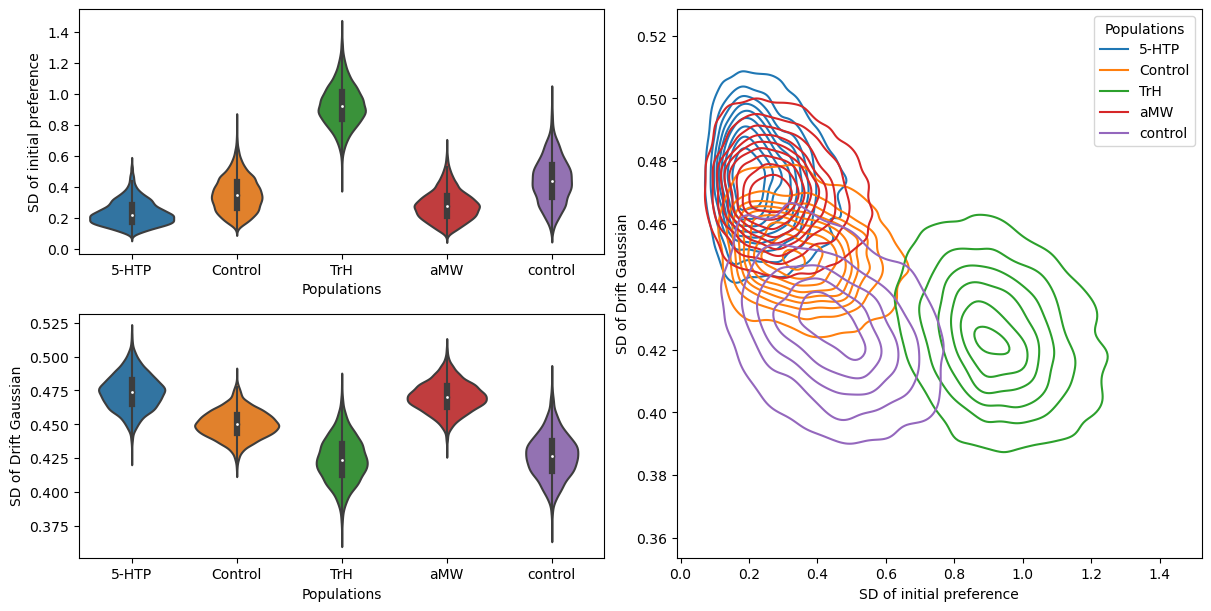

In [445]:
fig, fd = sh.plotResults(fit_singlephi, pd.Categorical(serall["Drug Treatment"]).categories, check=False)